## Train delay Prediction

#### 1.Import all library and Data Loading

In [382]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [383]:
df=pd.read_csv("train delay data.csv")

In [384]:
df.head()

,Distance Between Stations (km),Weather Conditions,Day of the Week,Time of Day,Train Type,Historical Delay (min),Route Congestion
0,100,Clear,Monday,Morning,Express,5,Low
1,150,Rainy,Tuesday,Afternoon,Superfast,10,Medium
2,200,Foggy,Wednesday,Evening,Local,15,High
3,50,Clear,Thursday,Night,Express,2,Low
4,75,Rainy,Friday,Morning,Superfast,8,Medium


In [385]:
df.tail()

,Distance Between Stations (km),Weather Conditions,Day of the Week,Time of Day,Train Type,Historical Delay (min),Route Congestion
2873,945,Clear,Tuesday,Night,Local,1210,Medium
2874,925,Rainy,Wednesday,Morning,Express,1215,High
2875,950,Foggy,Thursday,Afternoon,Superfast,1220,Low
2876,930,Clear,Friday,Evening,Local,1225,Medium
2877,955,Rainy,Saturday,Night,Express,1230,High


In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2878 entries, 0 to 2877
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Distance Between Stations (km)  2878 non-null   int64 
 1   Weather Conditions              2878 non-null   object
 2   Day of the Week                 2878 non-null   object
 3   Time of Day                     2878 non-null   object
 4   Train Type                      2878 non-null   object
 5   Historical Delay (min)          2878 non-null   int64 
 6   Route Congestion                2878 non-null   object
dtypes: int64(2), object(5)
memory usage: 157.5+ KB


In [387]:
(df.columns)

Index(['Distance Between Stations (km)', 'Weather Conditions',
       'Day of the Week', 'Time of Day', 'Train Type',
       'Historical Delay (min)', 'Route Congestion'],
      dtype='object')

In [388]:
df.value_counts()

Distance Between Stations (km)  Weather Conditions  Day of the Week  Time of Day  Train Type  Historical Delay (min)  Route Congestion
85                              Rainy               Wednesday        Morning      Express     35                      High                3
155                             Foggy               Wednesday        Morning      Superfast   45                      Low                 3
120                             Clear               Monday           Afternoon    Local       30                      Medium              3
110                             Foggy               Saturday         Evening      Superfast   55                      Low                 3
95                              Foggy               Friday           Night        Superfast   40                      Low                 3
                                                                                                                                         ..
10                       

In [389]:
df.describe()

,Distance Between Stations (km),Historical Delay (min)
count,2878.000000,2878.000000
mean,184.423211,93.324878
std,169.394783,195.923817
min,0.000000,0.000000
25%,70.000000,13.000000
50%,155.000000,35.000000
75%,225.000000,74.000000
max,955.000000,1230.000000


#### 2. Data Preprocessing

In [390]:
df.isnull()

,Distance Between Stations (km),Weather Conditions,Day of the Week,Time of Day,Train Type,Historical Delay (min),Route Congestion
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2873,False,False,False,False,False,False,False
2874,False,False,False,False,False,False,False
2875,False,False,False,False,False,False,False
2876,False,False,False,False,False,False,False


In [391]:
df.isnull().sum()

Distance Between Stations (km)    0
Weather Conditions                0
Day of the Week                   0
Time of Day                       0
Train Type                        0
Historical Delay (min)            0
Route Congestion                  0
dtype: int64

In [392]:
df.notnull()

,Distance Between Stations (km),Weather Conditions,Day of the Week,Time of Day,Train Type,Historical Delay (min),Route Congestion
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
2873,True,True,True,True,True,True,True
2874,True,True,True,True,True,True,True
2875,True,True,True,True,True,True,True
2876,True,True,True,True,True,True,True


In [393]:
df.notnull().sum()

Distance Between Stations (km)    2878
Weather Conditions                2878
Day of the Week                   2878
Time of Day                       2878
Train Type                        2878
Historical Delay (min)            2878
Route Congestion                  2878
dtype: int64

In [394]:
df.dropna()

,Distance Between Stations (km),Weather Conditions,Day of the Week,Time of Day,Train Type,Historical Delay (min),Route Congestion
0,100,Clear,Monday,Morning,Express,5,Low
1,150,Rainy,Tuesday,Afternoon,Superfast,10,Medium
2,200,Foggy,Wednesday,Evening,Local,15,High
3,50,Clear,Thursday,Night,Express,2,Low
4,75,Rainy,Friday,Morning,Superfast,8,Medium
...,...,...,...,...,...,...,...
2873,945,Clear,Tuesday,Night,Local,1210,Medium
2874,925,Rainy,Wednesday,Morning,Express,1215,High
2875,950,Foggy,Thursday,Afternoon,Superfast,1220,Low
2876,930,Clear,Friday,Evening,Local,1225,Medium


#### set the range for the target variable


In [395]:
df.rename(columns={'Historical Delay (min)': 'Delay (min)'}, inplace=True)

In [396]:
def delay_label(minutes):
    if minutes <= 5:
        return 'On Time'
    elif minutes <= 30:
        return 'Slight Delay'
    else:
        return 'Heavy Delay'

In [397]:

df['Delay_Status'] = df['Delay (min)'].apply(delay_label)

In [398]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


In [399]:
# if 'Delay_Status' in categorical_cols:
#     categorical_cols.remove('Delay_Status')

In [400]:
from sklearn.preprocessing import LabelEncoder

In [401]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

#### check relation in variable by ploting

Text(0.5, 1.0, 'Distribution of Delay (min)')

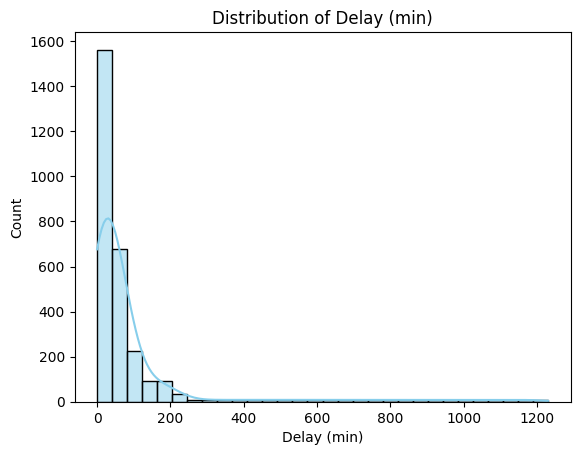

In [402]:

sns.histplot(df['Delay (min)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delay (min)')


C:\Users\adars\AppData\Local\Temp\ipykernel_1860\1659220947.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delay_Status', data=df, palette='Set2')


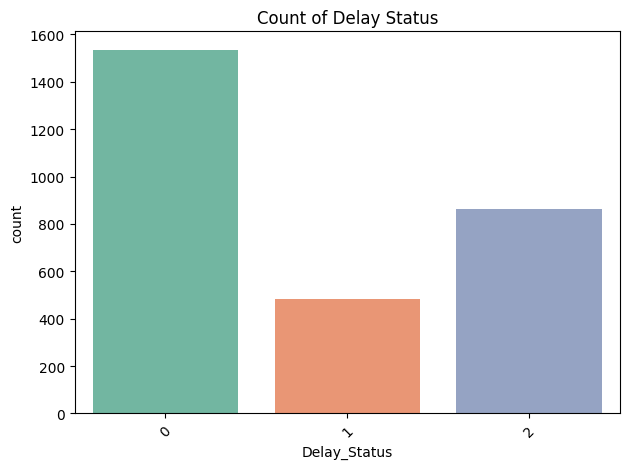

In [403]:
sns.countplot(x='Delay_Status', data=df, palette='Set2')
plt.title('Count of Delay Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### correlations for find relationship of feature variable to target variable

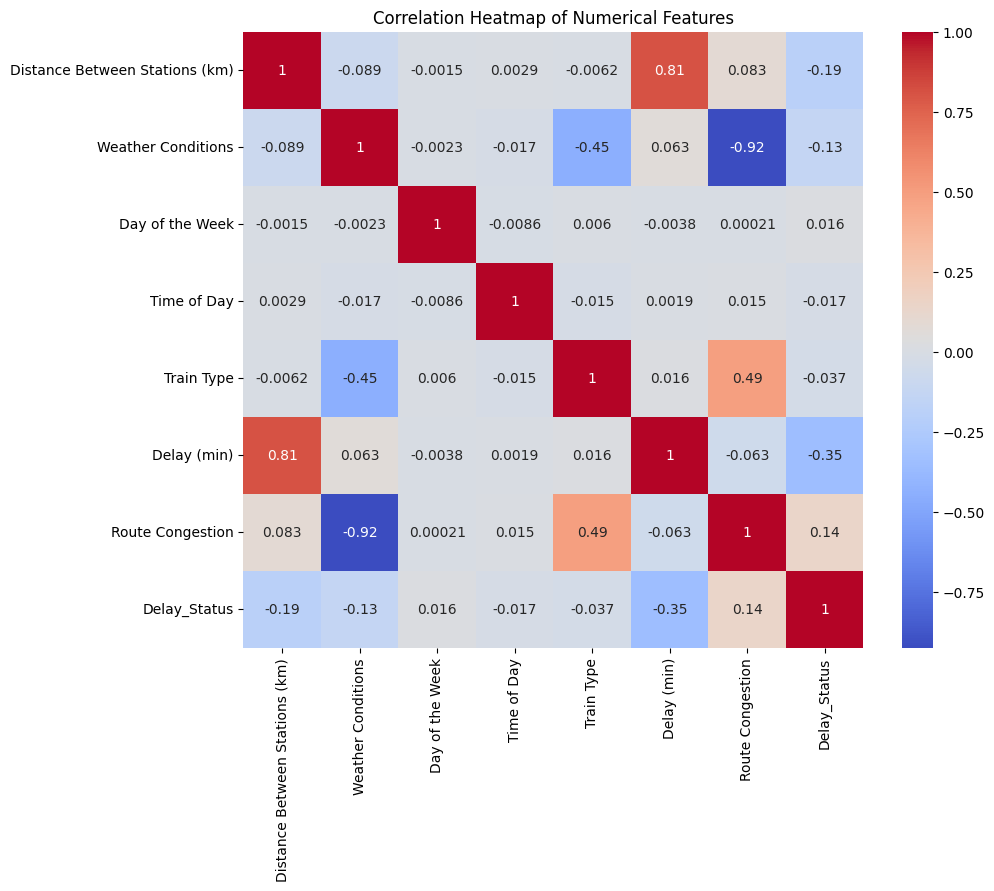

In [493]:
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_1860\941621302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_delay.index, y=corr_delay.values, palette='viridis')


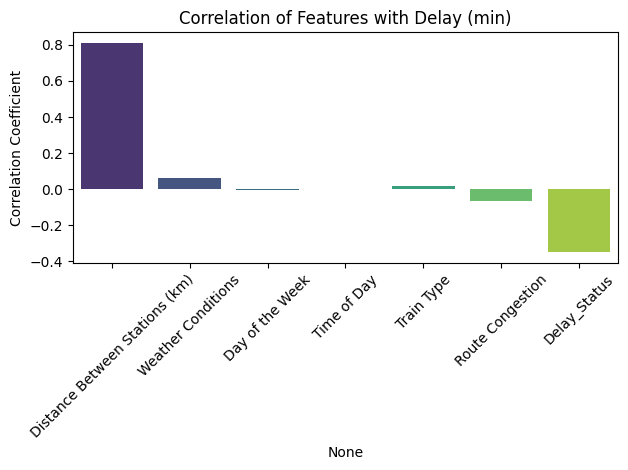

In [405]:

corr_delay = corr['Delay (min)'].drop('Delay (min)')
sns.barplot(x=corr_delay.index, y=corr_delay.values, palette='viridis')
plt.title('Correlation of Features with Delay (min)')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

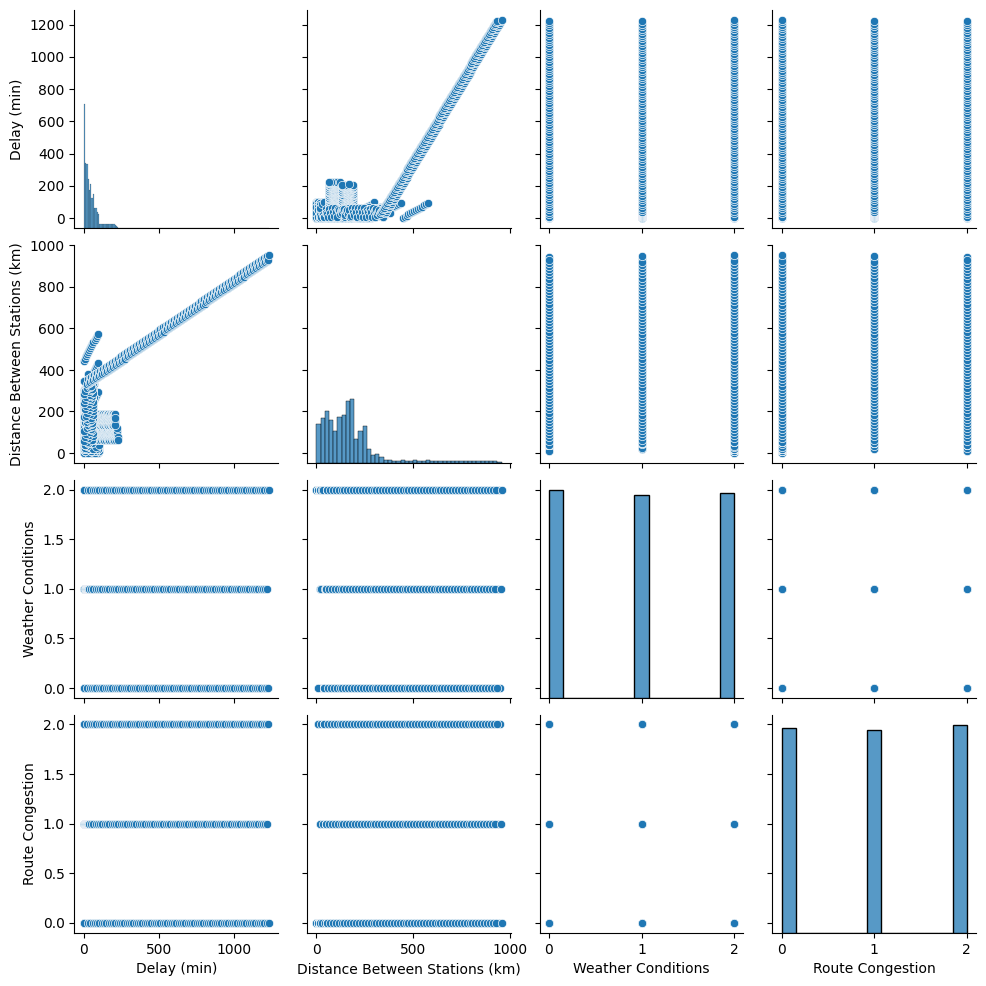

In [406]:
sns.pairplot(df[['Delay (min)', 'Distance Between Stations (km)',
                 'Weather Conditions', 'Route Congestion']])

plt.show()

### 3. Train-Test Split

In [474]:
from sklearn.model_selection import train_test_split


In [475]:
X = df.drop(['Delay_Status','Delay (min)'], axis=1)
y = df['Delay_Status']

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [477]:
X_train

,Distance Between Stations (km),Weather Conditions,Day of the Week,Time of Day,Train Type,Route Congestion
252,300,0,6,0,1,0
1808,95,1,5,2,2,1
1426,20,2,4,1,0,0
964,20,0,1,1,1,2
2601,265,2,6,3,0,0
...,...,...,...,...,...,...
1638,295,0,5,1,2,1
1095,0,2,2,0,0,0
1130,30,0,2,2,1,2
1294,30,2,1,3,0,0


In [478]:
y_train

252     2
1808    2
1426    0
964     2
2601    0
       ..
1638    0
1095    2
1130    0
1294    0
860     0
Name: Delay_Status, Length: 2302, dtype: int64

### 4.Model Selection 
#### LogisticRegression

In [479]:
from sklearn.linear_model import LogisticRegression


In [480]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


C:\Users\adars\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [481]:
y_pred = logreg.predict(X_test)

In [415]:
from sklearn.metrics import  accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5972222222222222


In [416]:
from sklearn.metrics import  confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[263  43   0]
 [ 20  79   0]
 [119  50   2]]


In [417]:
from sklearn.metrics import  classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.86      0.74       306
           1       0.46      0.80      0.58        99
           2       1.00      0.01      0.02       171

    accuracy                           0.60       576
   macro avg       0.70      0.56      0.45       576
weighted avg       0.72      0.60      0.50       576



#### GaussianNB

In [418]:
from sklearn.naive_bayes import GaussianNB

In [419]:
x = df.drop(['Delay_Status'], axis=1)
Y = df['Delay_Status']
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)


In [420]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [421]:
y_pred=nb.predict(X_test)

In [422]:
from sklearn.metrics import  accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9149305555555556


In [423]:
from sklearn.metrics import  confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[276   0  30]
 [  1  83  15]
 [  0   3 168]]


In [424]:
from sklearn.metrics import  classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       306
           1       0.97      0.84      0.90        99
           2       0.79      0.98      0.88       171

    accuracy                           0.91       576
   macro avg       0.92      0.91      0.91       576
weighted avg       0.93      0.91      0.92       576



#### KNeighborsClassifier

In [425]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [426]:

X = df.drop(['Delay_Status'], axis=1)
y = df['Delay_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [427]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [428]:
y_pred=knn.predict(X_test)

In [429]:
from sklearn.metrics import  accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.96875


In [430]:
from sklearn.metrics import  confusion_matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[300   0   6]
 [  0  95   4]
 [  2   6 163]]


In [431]:
from sklearn.metrics import  classification_report

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       306
           1       0.94      0.96      0.95        99
           2       0.94      0.95      0.95       171

    accuracy                           0.97       576
   macro avg       0.96      0.96      0.96       576
weighted avg       0.97      0.97      0.97       576



###  5.Evaluation of the model

In [432]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report

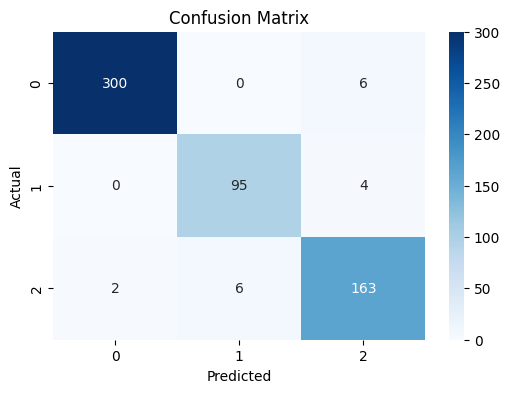

In [433]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 6.Visulization for evaluation

In [482]:
# for logistic regrassion
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)

In [483]:
from sklearn.preprocessing import label_binarize

In [484]:
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

#it is used for Initialize dictionaries for each metric:
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
avg_precision = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

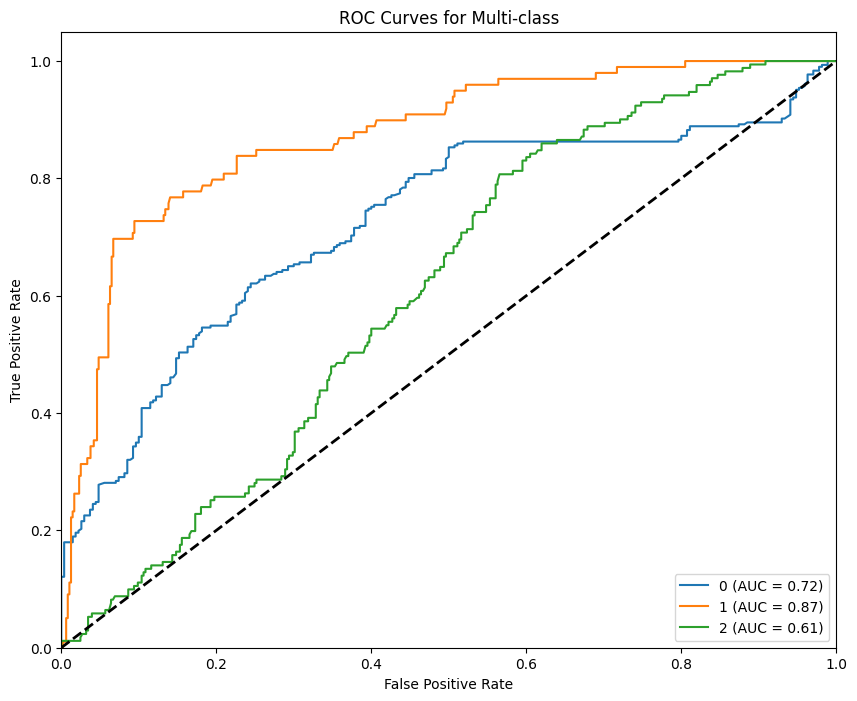

In [485]:
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-class')
plt.legend(loc="lower right")


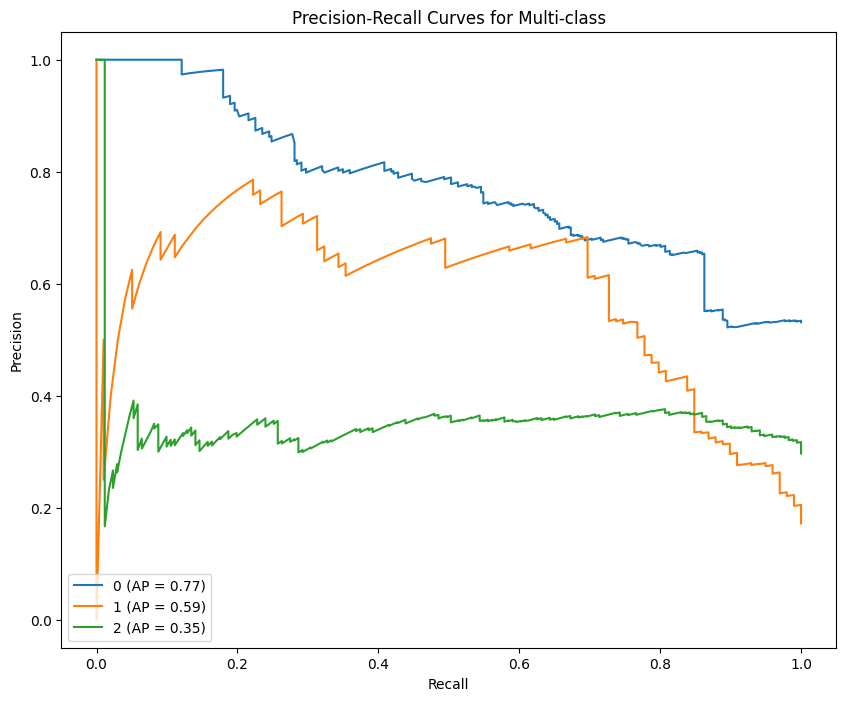

In [492]:
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    plt.plot(recall[i], precision[i], label=f'{class_name} (AP = {avg_precision[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multi-class')
plt.legend(loc="lower left")
plt.show()

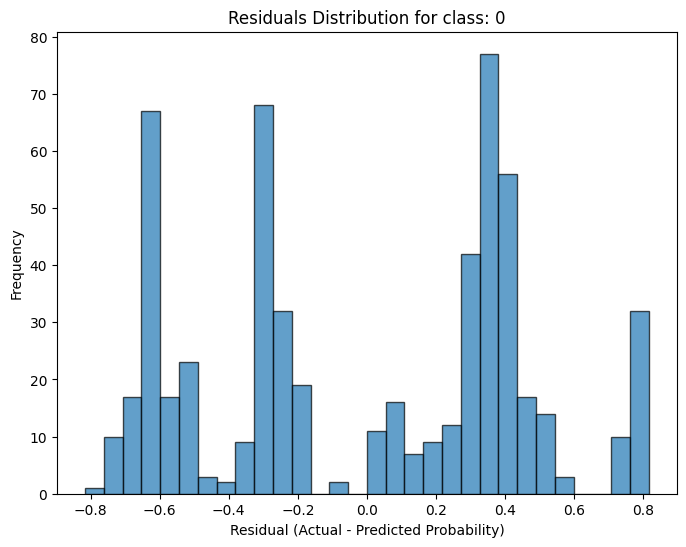

In [487]:
residuals = y_test_bin[:, 0] - y_prob[:, 0]
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Residuals Distribution for class: {classes[0]}')
plt.xlabel('Residual (Actual - Predicted Probability)')
plt.ylabel('Frequency')
plt.show()

#### for knn

In [440]:

y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

In [441]:
from sklearn.preprocessing import label_binarize

In [442]:
# Binarize the output labels for One-vs-Rest evaluation
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
avg_precision = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    avg_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

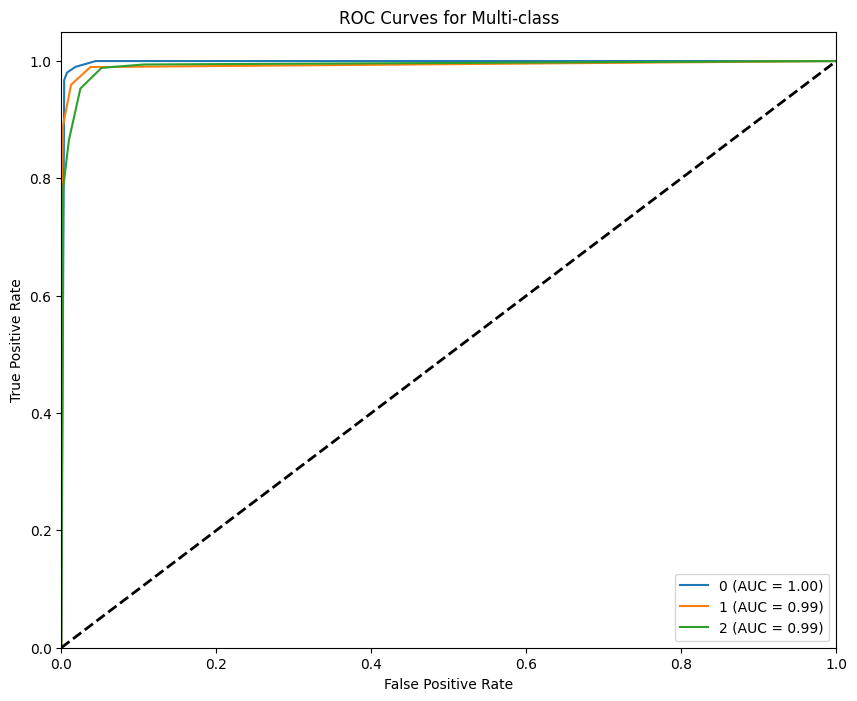

In [443]:
#Plot ROC curves for each class

plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    plt.plot(fpr[i], tpr[i], label=f'{class_name} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-class')
plt.legend(loc="lower right")
plt.show()

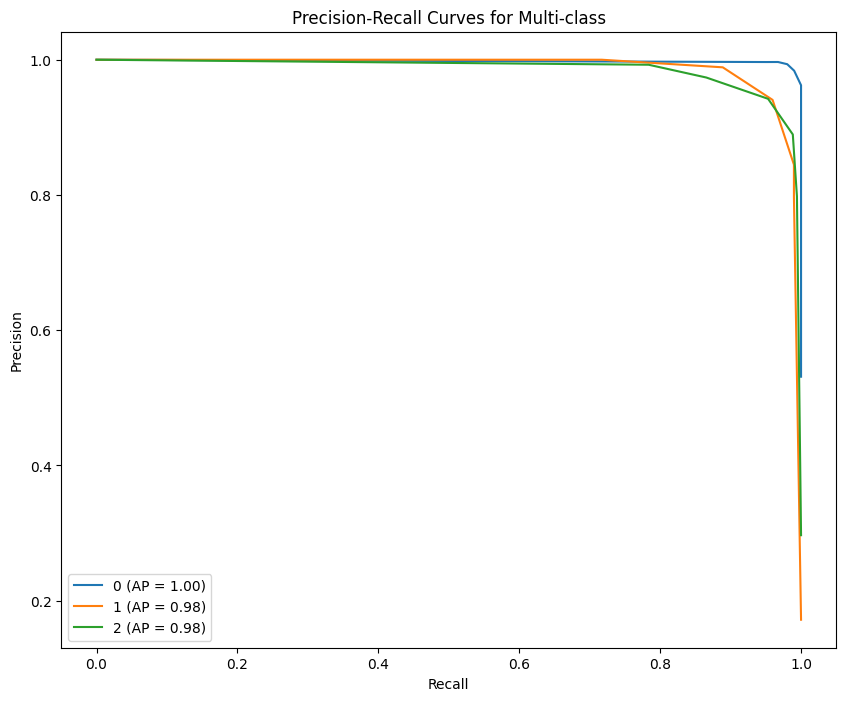

In [444]:
# Plot Precision-Recall curves for each class

plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    plt.plot(recall[i], precision[i], label=f'{class_name} (AP = {avg_precision[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Multi-class')
plt.legend(loc="lower left")
plt.show()

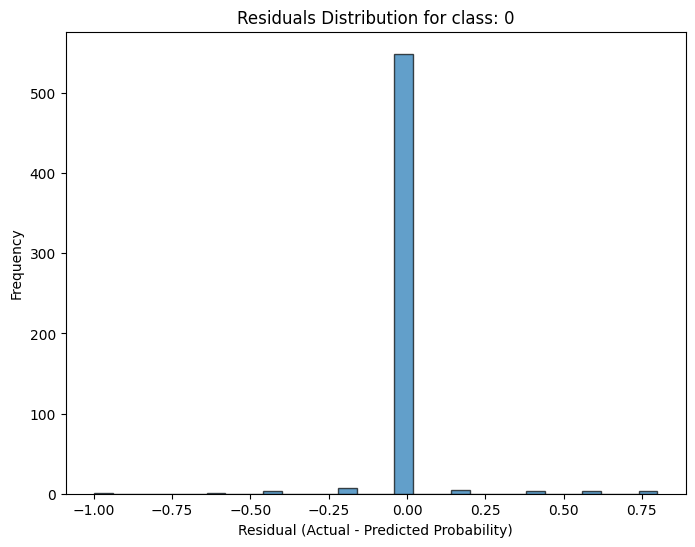

In [445]:
# Residual Analysis

residuals = y_test_bin[:, 0] - y_prob[:, 0]
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Residuals Distribution for class: {classes[0]}')
plt.xlabel('Residual (Actual - Predicted Probability)')
plt.ylabel('Frequency')
plt.show()

### comparision of model by visulization

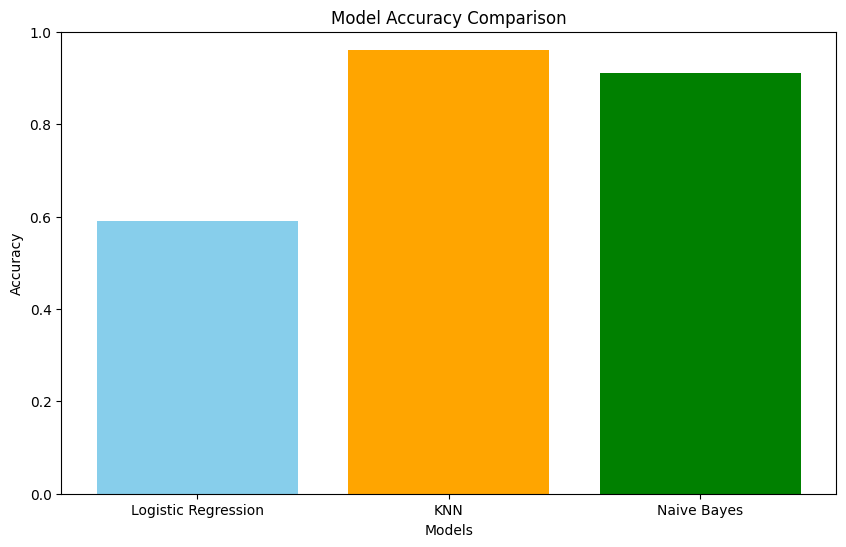

In [446]:
import matplotlib.pyplot as plt

# Replace these values with your actual model accuracies
model_names = ['Logistic Regression', 'KNN', 'Naive Bayes']
accuracies = [0.59, 0.96, 0.91]  # Update with your actual accuracy scores

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')

plt.show()


#### test any example

In [473]:
import pandas as pd

user_inputs = {
    'Distance Between Stations (km)': float(input("Enter distance between stations (in km): ")),
    'Weather Conditions': input("Enter weather conditions (Clear/Rainy/Foggy/Snowy): "),
    'Day of the Week': input("Enter day of the week (e.g., Monday, Tuesday, ...): "),
    'Time of Day': input("Enter time of day (Morning/Afternoon/Evening/Night): "),
    'Train Type': input("Enter train type (Passenger/Express/Freight): "),
    'Historical Delay (min)': float(input("Enter historical delay (in minutes): ")),
    'Route Congestion': input("Is the route congested? (Yes/No): ")
}

# Step 2: Define encoding maps (make sure these match what was used during training)
weather_map = {'Clear': 0, 'Rainy': 1, 'Foggy': 2, 'Snowy': 3}
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
           'Friday': 4, 'Saturday': 5, 'Sunday': 6}
time_map = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}
train_type_map = {'Passenger': 0, 'Express': 1, 'Freight': 2}
congestion_map = {'No': 0, 'Yes': 1}

# Step 3: Map user inputs
encoded_input = {
    'Distance Between Stations (km)': user_inputs['Distance Between Stations (km)'],
    'Weather Conditions': weather_map[user_inputs['Weather Conditions']],
    'Day of the Week': day_map[user_inputs['Day of the Week']],
    'Time of Day': time_map[user_inputs['Time of Day']],
    'Train Type': train_type_map[user_inputs['Train Type']],
    'Delay (min)': user_inputs['Historical Delay (min)'],
    'Route Congestion': congestion_map[user_inputs['Route Congestion']]
}


test_input = pd.DataFrame([encoded_input])

prediction = knn.predict(test_input)
probabilities = knn.predict_proba(test_input)


label_map = {
    0: "On Time",
    1: "Slight Delay",
    2: "Heavy Delay"
}

predicted_status = label_map[prediction[0]]

print("Predicted Delay Status:", predicted_status)
print("Prediction Probabilities:", probabilities)


Enter distance between stations (in km):  100
Enter weather conditions (Clear/Rainy/Foggy/Snowy):  Clear
Enter day of the week (e.g., Monday, Tuesday, ...):  Monday
Enter time of day (Morning/Afternoon/Evening/Night):  Morning
Enter train type (Passenger/Express/Freight):  Passenger
Enter historical delay (in minutes):  10
Is the route congested? (Yes/No):  No


Predicted Delay Status: Heavy Delay
Prediction Probabilities: [[0.  0.2 0.8]]
